## LSTM (Long-Short Term Memory)

Some Understanding of RNN(Recurrent Neural Network)

### Recurrent Neural Networks

<img src="image/img0.png">
When we think about one thing, we don't discard everything before, and then think with a blank brain. Human mind has persistence. Consider such a problem, when we talk to others, we want to predict what this person will say next, usually we need to understand what he said in the previous sentence, and then based on past communication experience, we can predict his next sentence. For example, "It's raining today, I" you might guess he would say "no umbrella" or "don't want to go out". Traditional neural networks cannot do this, and recurrent neural networks (RNNs) can solve the problem of correlation between sequence data.

The main purpose of the neural network is a processing cycle and the predicted sequence data, the network configuration information prior to the neural network memory cycle will, later affect the output node information before using its typical structure as shown below, it can be seen cycle The nodes between the hidden layers of the neural network are connected. The input of the hidden layer includes not only the input of the input layer but also the output of the previous hidden layer.

<img src="image/img1.png">

One disadvantage of the recurrent neural network structure in the figure above is that it uses only the previous information in the sequence to make predictions, and does not use the subsequent information. Because if this sentence is given, "Teddy Roosevelt was a great President." In order to determine whether Teddy is part of a person's name, it is not enough to know only the first two words in the sentence. This is also very useful, because the sentence may also be like, "Teddy bears are on sale!". So if only the first three words are given, it is impossible to know exactly whether Teddy is part of a person’s name. The first example is a person’s name, and the second example is not, so you can’t tell just by looking at the first three words.Therefore, BRNN is proposed to solve this problem.BLSTM is a typical representative of BRNN.


### LSTM (Long Short-Term Memory Network)

"A lot of factories are opened in a certain place, the air pollution is very serious ... the sky has turned gray", if our model is trying to predict the last word of this sentence "gray", it can not be done based on short-term dependence alone, because if We can't tell whether the sky is "blue" or "gray" without looking at the "air pollution is very serious" above. Therefore, the text gap between the current predicted position and related information may become very large. When this gap becomes large, the simple recurrent neural network will lose the ability to learn such far information. LSTM is used to solve such problems.

LSTM network is a special network structure with three "gates", which are "forget gate", "input gate", and "output gate" in this order.The figure below shows the network structure and formula of LSTM, where c is the memory cell state, x is the input, and a is the output of each layer.

<img src="image/img2.png">

Let's explain these three gates separately. Understanding the role of these three gates is also the key to understanding LSTM.

**1.Forgotten Gate:**

   Effect on: memory cell state

   Effect: Selective forgetting of information in memory cells

Example: "She is busy today ... I am" When predicting "am" we have to selectively forget the previous subject "She", otherwise a syntax error will occur.

**2.Input gate:**

   Effect on: memory cell state

   Effect: Record new information selectively into new cell states

Example: In the above sentence, we will update this subject information to the cell state based on "I", so "am" will be predicted at the end.

**3.Output gate:**

   Effect on: input and hidden layer output

   Effect: The final output includes both the cell state and the input, and the result is updated to the next hidden layer.
   
Through these three gates, the LSTM can more effectively decide which information is forgotten and which information is retained. Through the forward transmission diagram of the LSTM, we can see that a cell state can be easily transmitted to a long distance to affect the output, so the LSTM can Solve the learning of long distance information.

<img src="image/img3.png">

<img src="image/img4.png">


## Detail Explaination of LSTM architecture

LSTM is a very common and useful algorithm in deep learning, especially in natural language processing.What is the internal structure of the LSTM architecture? First, let's look at the overall framework of LSTM:

<img src="image/img7.png">

In this picture, there is an LSTM module in the middle, and there are three inputs: $c^{(t-1)}$ , $h^{(t-1)}$ and $x^t$ and then after LSTM, the outputs are $c^t$ , $h^t$ and $y^t$ , where $x^t$ represents the input of this round, $h^{(t-1)}$ represents the state quantity output of the previous round,$c^{(t-1)}$  represents the carrier of a global message in the previous round; then $y^t$ represents the output of this round,$h^t$ represents the state quantity output of this round,$c^t$ represents a global information carrier for this round. So it seems that a general framework of LSTM understands. What does the internal structure of LSTM look like?

First, we will $x^t$ and $h^{(t-1)}$ merges into a vector and multiplies by a vector *W* , another layer tanh function to get a vector z :

<img src="image/img8.png">

same thing, we will $x^t$ and $h^{(t-1)}$ merges into a vector, but our activation function uses *sigmoid* , the diagram is as follows:

<img src="image/img9.png">

multiply by the matrix $W^f$ , $W^i$ and $W^o$ get $z^f$ , $z^i$ and $z^o$ , then we can use these vectors to $c^{(t-1)}$ to obtain $c^t$ , the formula is:

<center>$c^t = z^f . c^{(t-1)} + z^i . z$</center>

then get c after, we can get $h^t$ , the formula is:

<center>$h^t = z^o . tanh (c^t)$</center>

Finally we can get the output of this round $y^t$ , the formula is:

<center>$y^t = \sigma(W'H^t)$</center>

In summary, we can get a complete internal structure of the LSTM as shown below:

<img src="image/img10.png">

With this structure, we can clearly and intuitively see the internal structure of the LSTM. First, the green part represents the input of the round $x^t$ and output $y^t$ ; the blue part indicates the status of the previous round $h^{(t-1)}$ and state quantities output by this round $h^t$ ; the red part represents the information carrier of the previous round $c^{t-1}$ and the information carrier output by this roundct $c^t$.This is a single LSTM unit. We can cascade multiple LSTM units to become our LSTM deep learning network. The diagram is as follows:

<img src="image/img11.png">

OK, after reading the overall architecture of the LSTM, let's analyze the specific each A part. The reason why the entire LSTM architecture can remember long-term information is mainlycn $c^n$ this state, we can see $c^{t-1}$ to $c^t$ middle only a small amount of information exchange, it is possible to maintain the entire network is passed between LSTM, is as follows c State diagram of t:

<img src="image/img12.png">

reason why LSTM can memorize long-term and short-term information is because it has a "gate" structure to remove and add information to the neuron. "Gate" is a method for selectively passing information. The first is theforget gate. The first step in LSTM is to decide what information we need to forget from the neuron state. As shown below, two inputs pass one *sigmoid* function, so the output value is 0 - Between1 , 1 means the information is completely retained, 0 means the information is completely forgotten. Through the forget gate, LSTM can selectively forget some meaningless information. As shown in the box below, this part is the forget gate in LSTM:

<img src="image/img13.png">

this part can be expressed by the formula:

<center>$z^f = \sigma(W_f.[h_{t-1}, x_t] + b_f)$</center>

Then the next step we need to confirm what new information is stored in a state of neurons, this section has two inputs, one *sigmoid* layer determines what value LSTM needs to be updated, a tanh layer creates a new candidate value vector, and this value will be added to the state. Then we need to use these two information to generate the update of the state, called theinput gate. The process is as follows:

<img src="image/img14.png">

entire process can be used The formula is expressed as:

<center>$z^i = \sigma(W_i.[h_{t-1}, x_t] + b_i)$</center>

<center>$z=tanh(W.[h_{t-1}, x_t] + b)$</center> 

identifying the information that needs to be updated, we can update c variable t is shown in the previous figure $c^{t-1}$ to c 
can be expressed by the formula:

<center>$c^t = z^f. c^{t-1} + z^i.z$</center>

in this process,$z^f.c^{t-1}$ represents the previous state information $c^{t-1}$ forgets some of the information to be discarded, and then adds the new candidate value vector of the LSTM system, which is the new round of information of the systemct $c^{t}$

After speaking the updated information state, we also need to update the neuron state of the systemh $h^t$, the whole process is shown in the box below:

<img src="image/img15.png">

This is theoutput gatethat controls the output of the LSTM. The system needs to determine what value to output. This output will also be based on the current state of the neuron. First we use *sigmoid* to determine which parts the neuron needs to output, then, we pass the information of the LSTM system through *tanh* function performs processing, and finally multiplies them to output, which is the new state quantity of LSTM. Plus this part *sigmoid*  is the output of this round $y^t$. Can be wrriten as:
<center>$z^o = \sigma(W_o.[h_{t-1}, x_t] + b_o)$</center>
<center>$h_t = z_o.tanh(c^t)$</center>
<center>$y_t = sigmoid(W'.h_t)$</center>

So the entire LSTM can be divided into these parts as described above, each part has a different role, I hope you got the idea about the architecture of LSTM this can help you thoroughly understand the structure and principle of the LSTM neural network. If there are any omissions in the text, please don't hesitate to suggest.

## LSTM Model


### Understand LSTM model

1. Long-short term memory model is a special RNN model, which is proposed to solve the problem of gradient dispersion of RNN models. In traditional RNN, the training algorithm uses BPTT(Backpropagation through time). For a long time, the residuals that need to be transmitted will decrease exponentially, causing the network weights to update slowly and fail to reflect the long-term memory effect of the RNN. Therefore, a storage unit is required to store the memory, so the LSTM model is proposed.

2. The following two figures show the difference between RNN and LSTM:

(1).RNN

<img src="image/img16.png">

(2). LSTM

<img src="image/img17.png">

PS:

(1).The meaning of some figures is as follows:

<img src="image/img18.png">

(2).The biggest difference between RNN and LSTM is that there is an additional information conveyor called "cell state" at the top of the LSTM, which is actually where the information is stored;

3. The core idea of LSTM:

(1) Understand the core of LSTM is "cell state", which is temporarily called the cell state, which is the top transmission line in the above picture, as follows:

<img src="image/img19.png">

(2) The cell state can also be understood as a conveyor belt. Personal understanding is actually the memory space in the entire model, which changes with time. Of course, the conveyor belt itself cannot control which information is stored. Control gate (gate);

(3) The structure of the control gate is as follows: It is mainly composed of a sigmoid function and a dot multiplication operation; the value of the sigmoid function is between 0-1. The dot multiplication operation determines how much information can be transmitted. When it is 0, it is not transmitted. When When it is 1, all transmission;

<img src="image/img20.png">

(4) There are 3 control gates in LSTM: input gate, output gate, memory gate;

4.LSTM works:

(1) forget gate: choose to forget certain past information:

<img src="image/img21.png">

(2) input gate: remember some information now:

<img src="image/img22.png">

(3) Merge past and present memories:

<img src="image/img23.png">image/

(4) output gate: output

<img src="image/img24.png">

PS: The above is the structure of the standard LSTM. In actual applications, it is often improved slightly according to needs;

5.Improvement of LSTM

(1) peephole connections: add a signal of cell state to the input of each gate

<img src="image/img25.png">

(2) coupled forget and input gates: merge forget and input gates

<img src="image/img26.png">

(B) LSTM model derivation

<img src="image/img27.png">

1. The idea of the LSTM model is to replace each hidden unit in the RNN with a cell with a memory function (as shown in the figure above), and the rest is the same as the RNN;

2. The composition of each cell is as follows:

(1) Input node (gc): As in RNN, it accepts the output of the hidden node at the previous point in time and the current input as input, and then passes a tanh activation function;

(2) Input gate (ic): It plays the role of controlling input information. The input of the gate is the output of the hidden node at the previous point in time and the current input. The activation function is sigmoid (the reason is that the output of sigmoid is between 0-1. Multiplying the output of the input gate by the output of the input node can control the amount of information);

(3) Internal state node (sc): The input is the current input filtered by the input gate and the internal state node output at the previous time point, as shown in the formula in the figure;

(4) Forget gate (fc): It plays the role of controlling internal state information. The input of the gate is the output of the hidden node at the previous point in time and the current input. The activation function is sigmoid (the reason is that the output of sigmoid is 0-1.) In the meantime, the output of the internal state node and the output of the forget gate can be used to control the amount of information);

(5) Output gate (oc): It plays the role of controlling output information. The input of the gate is the output of the hidden node at the previous point in time and the current input. The activation function is sigmoid (the reason is that the output of sigmoid is between 0-1 Multiplying the output of the output gate by the output of the internal state node can control the amount of information);

3. The calculation of the LSTM layer can be expressed as follows (several cells make up an LSTM layer):

<img src="image/img28.png">

PS: Wih in Equation 1 should be changed to Wgh; circles represent dot multiplication;

4. The LSTM model with 2 cells is as follows:

<img src="image/img29.png">

# Major Problems of RNN (Recurrent Neural Networks)

## **1. Vanishing Gradient Problem**

- During backpropagation through time (BPTT), the gradients get smaller and smaller as they propagate backward.
- This makes earlier layers learn **very slowly** or not at all, leading to **poor long-term memory**.

## **Understanding the Vanishing Gradient Problem**

- During backpropagation, the gradients of earlier layers shrink to nearly zero, making learning long-range dependencies difficult.
- This happens because gradients get **multiplied repeatedly by small values**, leading to **exponential decay**.

## Mathematical Explanation:

In RNNs, the hidden state at time step *t* is computed as:

$$h_t = \tanh(W_h h_{t-1} + W_x x_t + b)$$

where $W_h$ and $W_x$ are weight matrices.

**Backpropagation Through Time (BPTT):**

During backpropagation, the gradient of the loss $L$ with respect to an earlier hidden state is:

$$ \frac{\partial L}{\partial h_t} = \frac{\partial L}{\partial h_{t+1}} \cdot \frac{\partial h_{t+1}}{\partial h_t} $$

Since $\frac{\partial h_{t+1}}{\partial h_t}$ involves repeated multiplication by $W_h$, if $W_h$ has **small eigenvalues** (e.g., less than 1), the gradient shrinks exponentially:

$$ \frac{\partial L}{\partial h_0} \approx (\lambda_{max})^T $$

where $\lambda_{max}$ is the largest eigenvalue of $W_h$ and $T$ is the number of time steps.

**When $(\lambda_{max})^T \to 0$, gradients vanish, leading to no learning in earlier layers.**

## How LSTM Solves This?

LSTM avoids repeated multiplication by small values using a **cell state $C_t$** that has an **additive structure** rather than multiplicative:

$$C_t = f_t C_{t-1} + i_t \tilde{C_t}$$

where:

- $f_t$ (**forget gate**) controls memory retention.
- $i_t$ (**input gate**) controls new information.
- $\tilde{C_t}$ is the candidate memory.

**Since $C_t$ allows direct gradient flow without vanishing, LSTMs can remember long-term dependencies effectively.**

## **2. Exploding Gradient Problem**

- If the gradients become **too large**, weight updates can grow exponentially, causing **instability in training**.
- This can lead to **NaN (Not a Number) errors** or an **unstable model**.
- A common solution is **gradient clipping** (limiting gradient values).

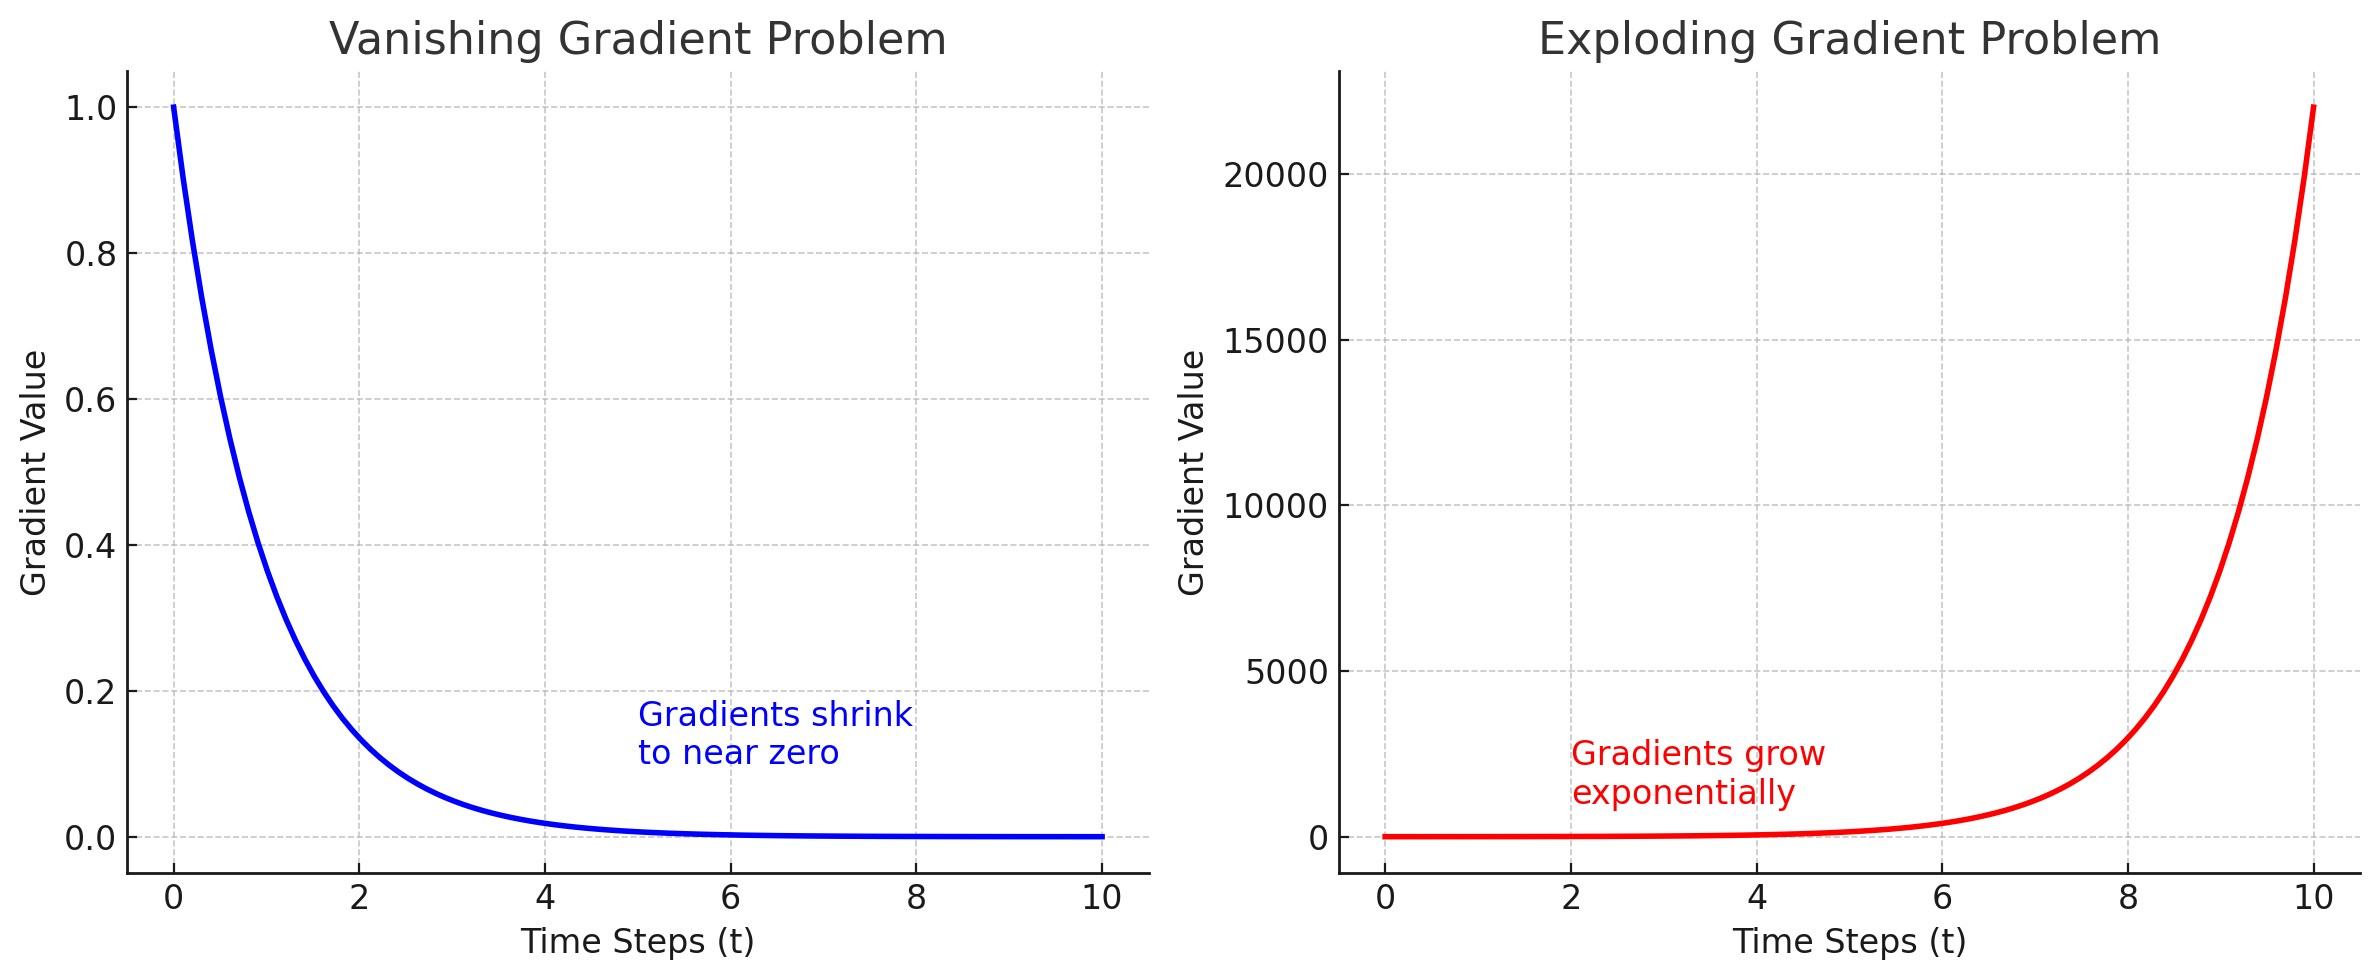

## **3. Short-Term Memory**

- RNNs struggle to learn **long-range dependencies** because of vanishing gradients.
- It tends to **forget information** after a few time steps.

## **4. Slow Training**

- RNNs process sequences **sequentially**, meaning they **cannot be parallelized efficiently**.
- This makes training **slower** compared to other architectures like CNNs or Transformers.

## **5. Difficulty in Handling Long Sequences**

- Since RNNs process information **step-by-step**, **longer sequences** require **more time and memory**.
- This makes them **inefficient** for tasks like **machine translation** or **speech recognition**.

## 📊 **Results & Analysis**

- LSTMs outperformed traditional RNNs in capturing long-term dependencies.
- They demonstrated superior accuracy in applications like **speech recognition, sentiment analysis, and stock market prediction**.
- The study found that **hyperparameter tuning (hidden layers, dropout rate, learning rate)** significantly affects performance.

## 🏁 **Conclusion**

- LSTMs effectively mitigate the vanishing gradient problem.
- They are highly beneficial for tasks requiring **long-term memory**, such as NLP and time-series forecasting.
- Future research may focus on improving efficiency with models like **GRUs or Transformer-based architectures**.